# Análisis de las carpetas de investigación

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Personas físicas

In [63]:
df_fisica = pd.read_csv("data/fisicas.csv")
df_fisica.head(1)
df_fisica.size

619368

### Analisis univariado

Para analizar los datos categóricos como delitos, categorías, calidad, etc. No podemos utilizar medidas de tendencia central para su análisis, debido a que son **datos categóricos nominales**.

In [4]:
df_fisica[["delito", "sexo", "calidad", "competencia", "mes", "alcaldia", "colonia", "fecha", "hora"]].mode()

,delito,sexo,calidad,competencia,mes,alcaldia,colonia,fecha,hora
0,VIOLENCIA FAMILIAR,Femenino,VICTIMA Y DENUNCIANTE,FUERO COMUN,Enero,IZTAPALAPA,CENTRO VIII,2023-02-10,12:00:00


Analizando modas individualmente se pueden obtener los siguientes puntos:

1. El delito más denunciado es el de VIOLENCIA FAMILIAR
2. El sexo más afectado es el FEMENINO
3. La calidad del que presenta la denuncia es mayormente VICTIMA Y DENUNCIANTE
4. El mes con más denuncias hasta marzo 31 de 2023 es ENERO
5. La alcaldía con más denuncias es IZTAPALAPA
6. La colonia con más denuncias es CENTRO VIII
7. La edad más común de las personas afectadas es de 42 años

Analizando las edades de las personas femeninas victimas de ese delito

In [62]:
mujeres_familiar = df_fisica.loc[(df_fisica["sexo"] == "Femenino") & (df_fisica["delito"] == "VIOLENCIA FAMILIAR")]

mujeres_familiar.describe()
sample = df_fisica.groupby(by="delito").size().reset_index(name="Frecuencia").sort_values(by="Frecuencia", ascending=False)

sample.head(50)

,delito,Frecuencia
196,VIOLENCIA FAMILIAR,10053
7,AMENAZAS,5220
48,FRAUDE,5058
144,ROBO DE ACCESORIOS DE AUTO,2570
155,ROBO DE OBJETOS,2212
138,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,1971
157,ROBO DE OBJETOS DEL INTERIOR DE UN VEHICULO,1518
188,USURPACIÓN DE IDENTIDAD,1508
3,ABUSO SEXUAL,1189
28,DESPOJO,1011


In [31]:
mujeres = df_fisica.loc[(df_fisica["sexo"] == "Femenino")]

mujeres["categoria"].nunique()

14

In [34]:
cantidad_categorias = mujeres["categoria"].nunique()


In [42]:
agrupado = mujeres.groupby(by=["categoria"]).size().reset_index(name="frecuencia")
agrupado

,categoria,frecuencia
0,DELITO DE BAJO IMPACTO,24429
1,HOMICIDIO DOLOSO,42
2,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,14
3,ROBO A CASA HABITACIÓN CON VIOLENCIA,35
4,ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON ...,33
5,ROBO A NEGOCIO CON VIOLENCIA,45
6,ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN ...,81
7,ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA,14
8,ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VI...,104
9,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,5


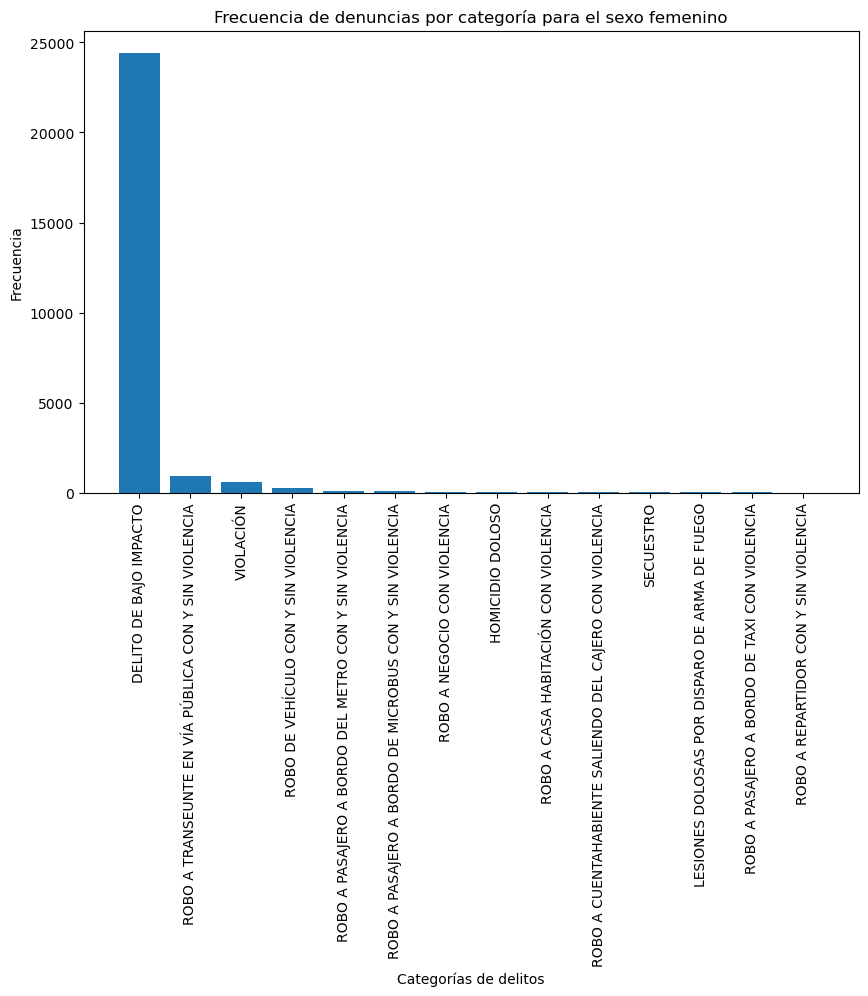

In [37]:
# Ordena el DataFrame 'agrupado' por la columna 'frecuencia' en orden descendente
agrupado_ordenado = agrupado.sort_values(by='frecuencia', ascending=False)

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.bar(agrupado_ordenado['categoria'], agrupado_ordenado['frecuencia'])  # Grafica las barras

# Configuración adicional (opcional)
plt.title('Frecuencia de denuncias por categoría para el sexo femenino')  # Título del gráfico
plt.xlabel('Categorías de delitos')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=90)  # Rotación de las etiquetas en el eje x para mayor legibilidad

plt.show()  # Muestra el gráfico